In [1]:
pip install pandas-datareader

In [2]:
import pandas_datareader as pdr
import datetime
import pandas as pd

start = datetime.datetime(2018,1,1)
end = datetime.datetime(2024,7,20)
print(start,end)

2018-01-01 00:00:00 2024-07-20 00:00:00


In [7]:
stock = ['TSLA']
data = pdr.DataReader(stock,'stooq',str(start.date()),str(end.date())).stack('Symbols')
data.head()

,Attributes,Close,High,Low,Open,Volume
Date,Symbols,,,,,
2024-07-19,TSLA,239.20,249.44,236.8300,247.79,87403903
2024-07-18,TSLA,249.23,257.14,247.2000,251.09,110869037
2024-07-17,TSLA,248.50,258.47,246.1820,252.73,115584810
2024-07-16,TSLA,256.56,258.62,245.8001,255.31,126332470
2024-07-15,TSLA,252.64,265.60,251.7300,255.97,146912920


In [9]:
newData = data.reset_index()
newData.head()


Attributes,Date,Symbols,Close,High,Low,Open,Volume
0,2024-07-19,TSLA,239.20,249.44,236.8300,247.79,87403903
1,2024-07-18,TSLA,249.23,257.14,247.2000,251.09,110869037
2,2024-07-17,TSLA,248.50,258.47,246.1820,252.73,115584810
3,2024-07-16,TSLA,256.56,258.62,245.8001,255.31,126332470
4,2024-07-15,TSLA,252.64,265.60,251.7300,255.97,146912920


In [10]:
newData.to_csv('Tesla_stock_2018_to_2024.csv')

In [11]:
data = pd.read_csv('/content/Tesla_stock_2018_to_2024.csv')
data.head()

,Unnamed: 0,Date,Symbols,Close,High,Low,Open,Volume
0,0,2024-07-19,TSLA,239.20,249.44,236.8300,247.79,87403903
1,1,2024-07-18,TSLA,249.23,257.14,247.2000,251.09,110869037
2,2,2024-07-17,TSLA,248.50,258.47,246.1820,252.73,115584810
3,3,2024-07-16,TSLA,256.56,258.62,245.8001,255.31,126332470
4,4,2024-07-15,TSLA,252.64,265.60,251.7300,255.97,146912920


In [15]:
data.set_index('Date',inplace=True)
data.head()

,Unnamed: 0,Symbols,Close,High,Low,Open,Volume
Date,,,,,,,
2024-07-19,0,TSLA,239.20,249.44,236.8300,247.79,87403903
2024-07-18,1,TSLA,249.23,257.14,247.2000,251.09,110869037
2024-07-17,2,TSLA,248.50,258.47,246.1820,252.73,115584810
2024-07-16,3,TSLA,256.56,258.62,245.8001,255.31,126332470
2024-07-15,4,TSLA,252.64,265.60,251.7300,255.97,146912920


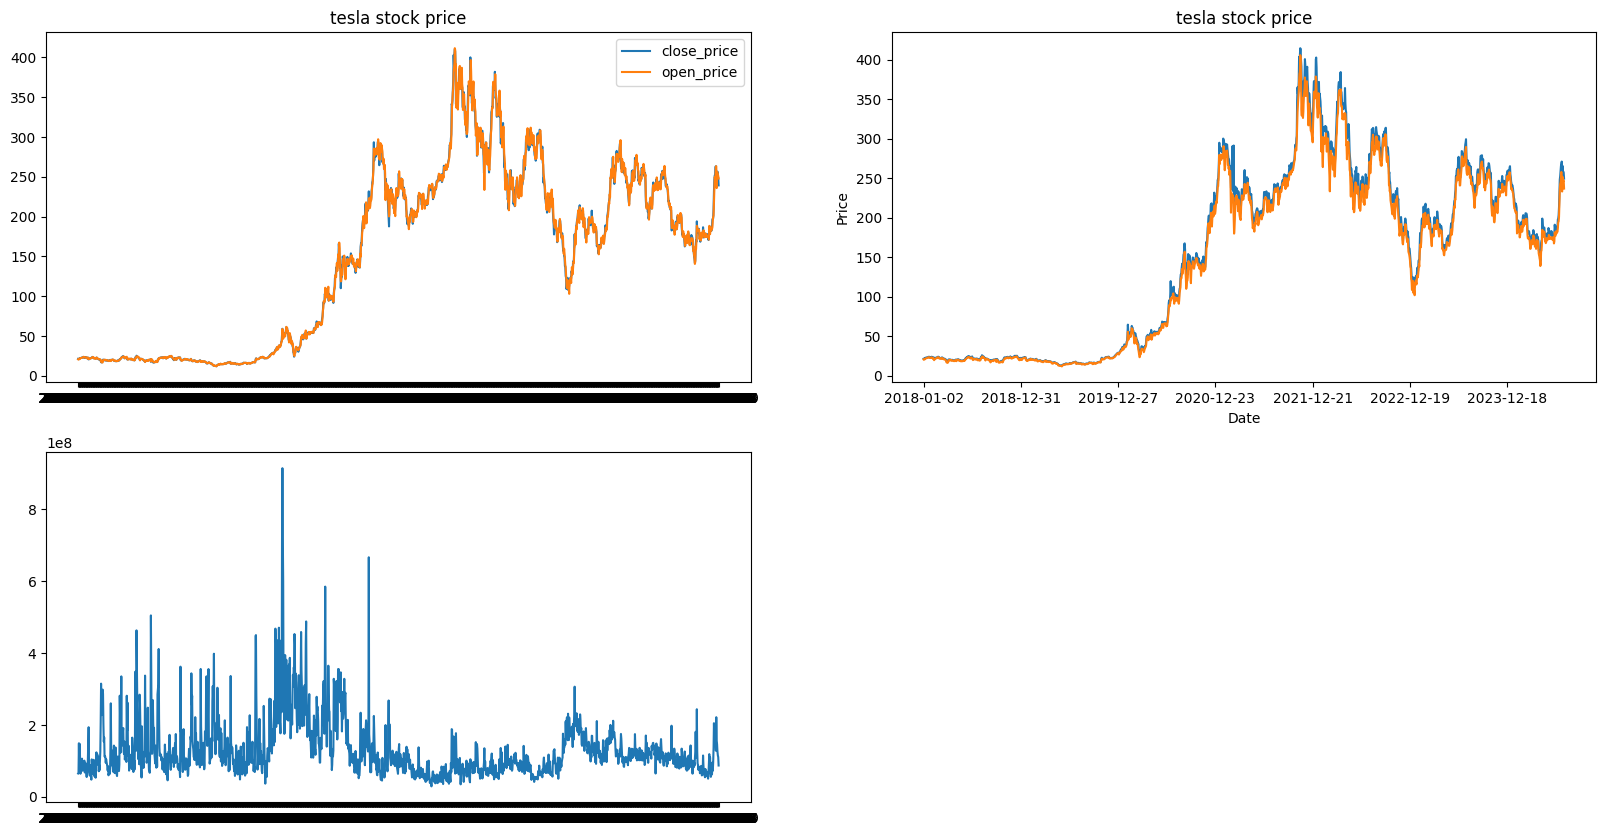

In [32]:
import matplotlib.pyplot as plt
plt.figure(1,(20,10))
newData=data.iloc[::-1]
plt.subplot(2,2,1)
close_price = newData['Close']
plt.plot(close_price,label='close_price')
open = newData['Open']
plt.plot(open,label='open_price')
plt.legend()
plt.title('tesla stock price')



plt.subplot(2,2,2)
high=newData['High']
low = newData['Low']
high.plot(xlabel='Date',ylabel='Price',label='TSLA',title='tesla stock price')
low.plot(xlabel='Date',ylabel='Price',label='TSLA',title='tesla stock price')




plt.subplot(2,2,3)
volume = newData['Volume']
plt.plot(volume,label='volume')

<ipython-input-37-ba458e9f1168>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newData['SMA_20'] = newData['Close'].rolling(20).mean()
<ipython-input-37-ba458e9f1168>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newData['SMA_50']= newData['Close'].rolling(50).mean()


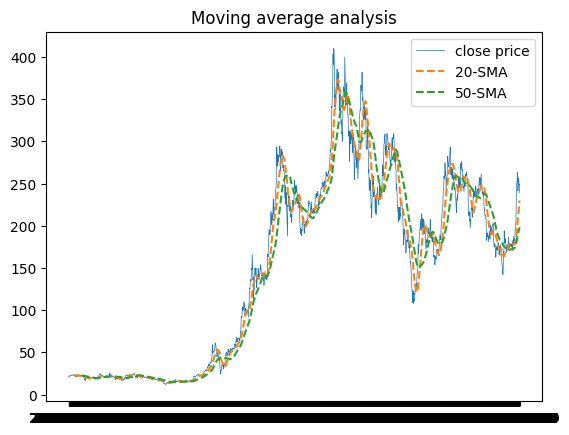

In [37]:
#moving average
newData['SMA_20'] = newData['Close'].rolling(20).mean()
newData['SMA_50']= newData['Close'].rolling(50).mean()
plt.figure(1)
plt.plot(newData['Close'],label='close price',linewidth=0.5)
plt.plot(newData['SMA_20'],label='20-SMA',linestyle='--')
plt.plot(newData['SMA_50'],label='50-SMA',linestyle='--')
plt.title('Moving average analysis')
plt.legend()



In [35]:
!pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29411 sha256=f672854ab088de9d0701668b2ba68f1ade869f74ec0866460f0135134f9d78aa
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


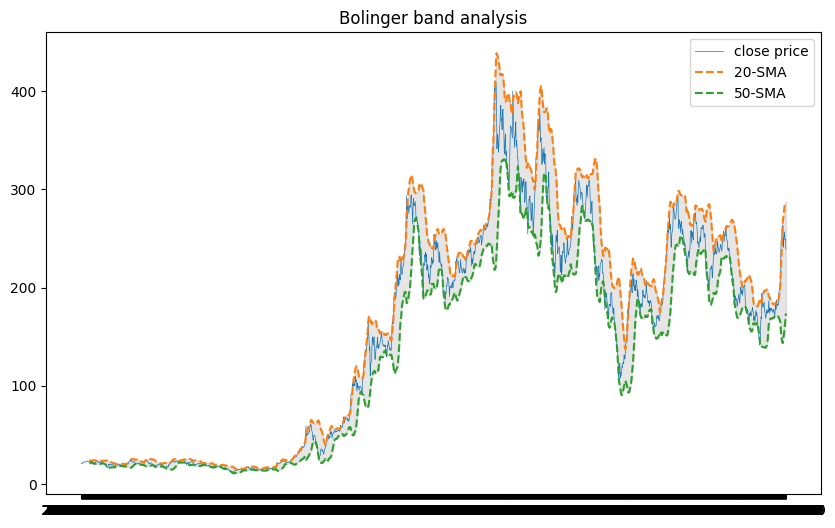

In [40]:
import ta
bb = ta.volatility.BollingerBands(newData['Close'],window=20,window_dev=2)
newData['BB_High']=bb.bollinger_hband()
newData['BB_Low']=bb.bollinger_lband()
plt.figure(1,(10,6))
plt.plot(newData['Close'],label='close price',linewidth=0.5)
plt.plot(newData['BB_High'],label='BB_High',linestyle='--')
plt.plot(newData['BB_Low'],label='BB_Low',linestyle='--')
plt.fill_between(newData.index,newData['BB_High'],newData['BB_Low'],color = 'gray',alpha=0.2)
plt.title('Bolinger band analysis')
plt.legend()



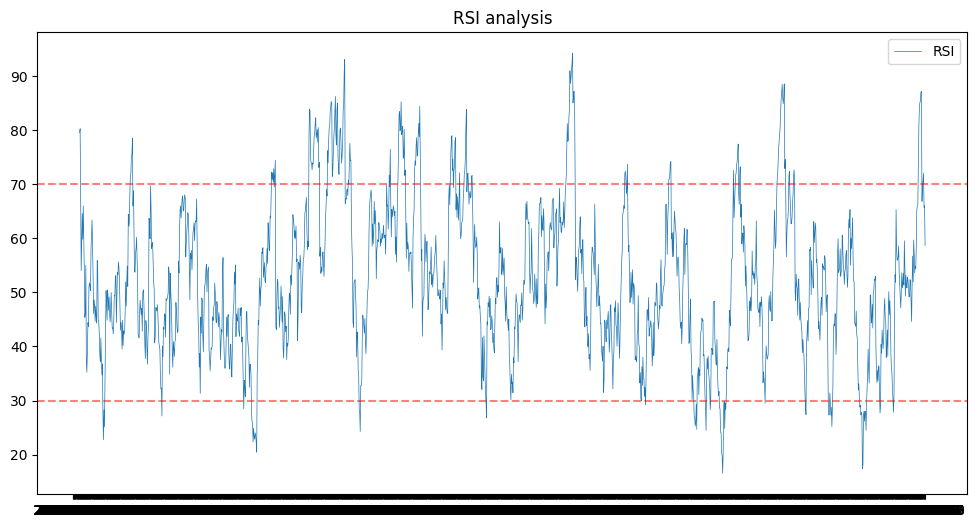

In [43]:
newData['RSI']=ta.momentum.rsi(newData['Close'],window=14)

plt.figure(1,(12,6))
plt.plot(newData['RSI'],label='RSI',linewidth=0.5)
plt.axhline(70,linestyle='--',color='red',alpha=0.5)
plt.axhline(30,linestyle='--',color='red',alpha=0.5)
plt.title('RSI analysis')
plt.legend()




In [47]:
newData.to_csv('new_updated_features.csv')

In [ ]:
# rsi is the momentum ausilater that measurws the speed and chagnge of price movement it ranges from (0-100) with a value up of 70 indicates overbought conditions value below 30 indicates over sold conditions